In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
%matplotlib inline

In [3]:
data=pd.read_excel('chapter-12-relay-foods.xlsx', sheetname="Purchase Data - Full Study")

In [4]:
data

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate
0,262,2009-01-11,47,50.6700,TRQKD,2,2009-01-12
1,278,2009-01-20,47,26.6000,4HH2S,3,2009-01-20
2,294,2009-02-03,47,38.7100,3TRDC,2,2009-02-04
3,301,2009-02-06,47,53.3800,NGAZJ,2,2009-02-09
4,302,2009-02-06,47,14.2800,FFYHD,2,2009-02-09
5,321,2009-02-17,47,29.5000,HA5R3,3,2009-02-17
6,333,2009-02-23,47,18.9100,RSXQG,2,2009-02-23
7,341,2009-03-01,47,64.4100,KHBDJ,3,2009-03-03
8,353,2009-03-09,47,18.0300,T7SUN,3,2009-03-10
9,373,2009-03-17,47,25.5500,KMF5X,3,2009-03-17


In [6]:
data['OrderPeriod'] = data.OrderDate.apply(lambda x: x.strftime('%Y-%m'))
data.head()

,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod
0,262,2009-01-11,47,50.67,TRQKD,2,2009-01-12,2009-01
1,278,2009-01-20,47,26.60,4HH2S,3,2009-01-20,2009-01
2,294,2009-02-03,47,38.71,3TRDC,2,2009-02-04,2009-02
3,301,2009-02-06,47,53.38,NGAZJ,2,2009-02-09,2009-02
4,302,2009-02-06,47,14.28,FFYHD,2,2009-02-09,2009-02


In [7]:
data.set_index('UserId', inplace=True)

data['CohortGroup'] = data.groupby(level=0)['OrderDate'].min().apply(lambda x: x.strftime('%Y-%m'))
data.reset_index(inplace=True)
data.head()

,UserId,OrderId,OrderDate,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
0,47,262,2009-01-11,50.67,TRQKD,2,2009-01-12,2009-01,2009-01
1,47,278,2009-01-20,26.60,4HH2S,3,2009-01-20,2009-01,2009-01
2,47,294,2009-02-03,38.71,3TRDC,2,2009-02-04,2009-02,2009-01
3,47,301,2009-02-06,53.38,NGAZJ,2,2009-02-09,2009-02,2009-01
4,47,302,2009-02-06,14.28,FFYHD,2,2009-02-09,2009-02,2009-01


In [8]:
grouped = data.groupby(['CohortGroup', 'OrderPeriod'])
cohorts = grouped.agg({'UserId': pd.Series.nunique,
                       'OrderId': pd.Series.nunique,
                       'TotalCharges': np.sum})

In [9]:
cohorts.head()

TotalCharges  OrderId  UserId
CohortGroup OrderPeriod                               
2009-01     2009-01          1850.255       30      22
            2009-02          1351.065       25       8
            2009-03          1357.360       26      10
            2009-04          1604.500       28       9
            2009-05          1575.625       26      10

In [10]:
cohorts.groupby(level=0)
def eger(cohorts):
    cohorts['CohortPeriod'] = list(range(1, len(cohorts)+1))
    return cohorts

In [11]:
cohorts = cohorts.groupby(level=0).apply(eger)
cohorts.head()

TotalCharges  OrderId  UserId  CohortPeriod
CohortGroup OrderPeriod                                             
2009-01     2009-01          1850.255       30      22             1
            2009-02          1351.065       25       8             2
            2009-03          1357.360       26      10             3
            2009-04          1604.500       28       9             4
            2009-05          1575.625       26      10             5

In [41]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['CohortGroup', 'CohortPeriod'], inplace=True)

cgsize = cohorts['UserId'].groupby(level=0).first()
cgsize

CohortGroup
2009-01     22
2009-02     15
2009-03     13
2009-04     39
2009-05     50
2009-06     32
2009-07     50
2009-08     31
2009-09     37
2009-10     54
2009-11    130
2009-12     65
2010-01     95
2010-02    100
2010-03     24
Name: UserId, dtype: int64

In [14]:
cohorts['UserId'].unstack(0).head()

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,22.0,15.0,13.0,39.0,50.0,32.0,50.0,31.0,37.0,54.0,130.0,65.0,95.0,100.0,24.0
2,8.0,3.0,4.0,13.0,13.0,15.0,23.0,11.0,15.0,17.0,32.0,17.0,50.0,19.0,NaN
3,10.0,5.0,5.0,10.0,12.0,9.0,13.0,9.0,14.0,12.0,26.0,18.0,26.0,NaN,NaN
4,9.0,1.0,4.0,13.0,5.0,6.0,10.0,7.0,8.0,13.0,29.0,7.0,NaN,NaN,NaN
5,10.0,4.0,1.0,6.0,4.0,7.0,11.0,6.0,13.0,13.0,13.0,NaN,NaN,NaN,NaN


In [16]:
usrtn= cohorts['UserId'].unstack(0).divide(cgsize, axis=1)
usrtn.head(5)

CohortGroup,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03
CohortPeriod,,,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.00,1.00000,1.00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00,1.0
2,0.363636,0.200000,0.307692,0.333333,0.26,0.46875,0.46,0.354839,0.405405,0.314815,0.246154,0.261538,0.526316,0.19,NaN
3,0.454545,0.333333,0.384615,0.256410,0.24,0.28125,0.26,0.290323,0.378378,0.222222,0.200000,0.276923,0.273684,NaN,NaN
4,0.409091,0.066667,0.307692,0.333333,0.10,0.18750,0.20,0.225806,0.216216,0.240741,0.223077,0.107692,NaN,NaN,NaN
5,0.454545,0.266667,0.076923,0.153846,0.08,0.21875,0.22,0.193548,0.351351,0.240741,0.100000,NaN,NaN,NaN,NaN


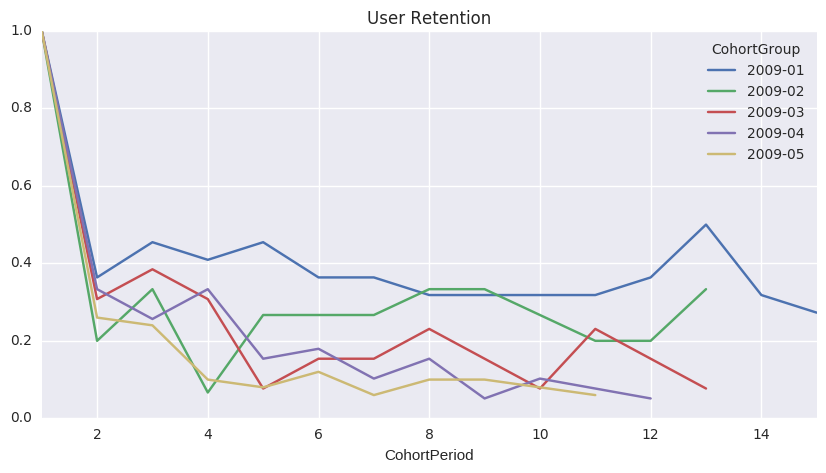

In [28]:
usrtn[['2009-01', '2009-02', '2009-03', '2009-04', '2009-05']].plot(figsize=(10,5))
plt.title('User Retention')



(0.0, 1.5)

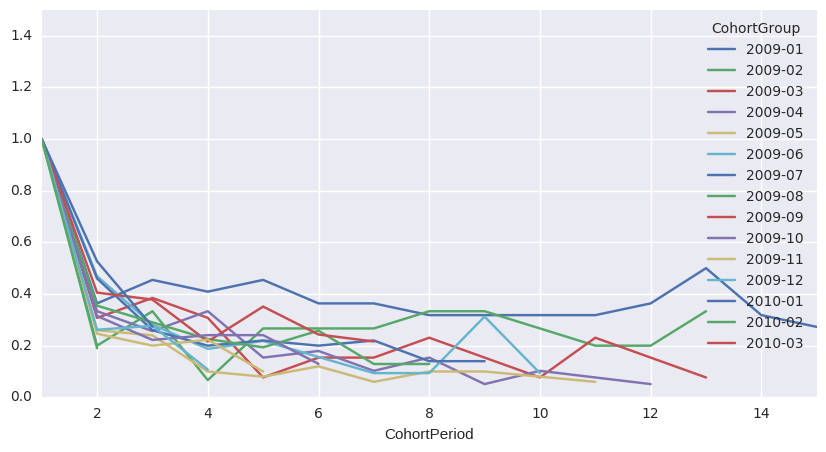

In [30]:
usrtn.plot(figsize=(10,5))
plt.ylim(0.0, 1.5)

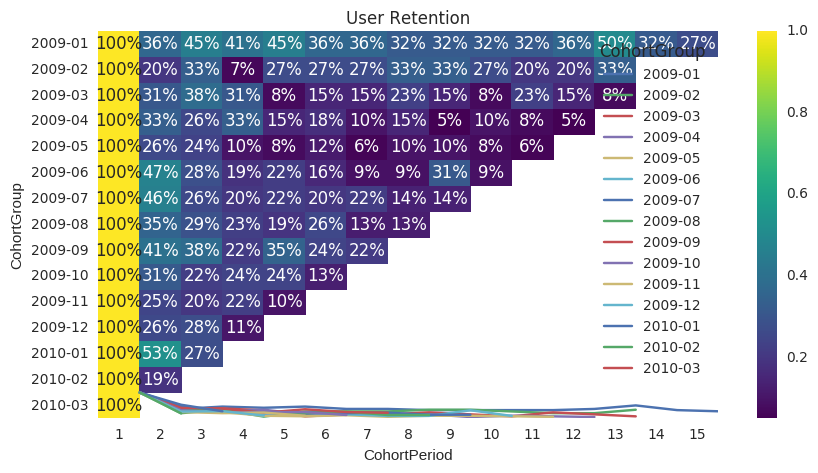

In [39]:
usrtn.plot(figsize=(10,5))
sb.heatmap(usrtn.T, annot=True,mask=usrtn.T.isnull(), fmt=".0%", cmap='viridis')
plt.title("User Retention")
